# FastAI Lecture One

We will be looking at the [Blue Book for Bulldozers Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers) competition.
The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuration. 
The data is sourced from auction result postings and includes information on usage and equipment configurations.


The [data](https://www.kaggle.com/c/bluebook-for-bulldozers/data) for this competition is split into three parts:

  1. **Train.csv** is the training set, which contains data through the end of 2011.
  
  2. **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012.
  
  3. **Test.csv** is the test set. It contains data from May 2012 - November 2012.

In [1]:
# reload external modules without re-importing
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.insert(0, '/home/djordjije/Desktop/learning/machine-learning/')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import modules.structured as structured

from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [4]:
plt.style.use('ggplot')

color_palette = {
     'crimson': '#a50026', 
     'red': '#d73027',
     'redorange': '#f46d43', 
     'orange': '#fdae61',
     'yellow': '#fee090', 
     'sky': '#e0f3f8',
     'babyblue': '#abd9e9', 
     'lightblue': '#74add1',
     'blue': '#4575b4', 
     'purple': '#313695'
}

In [5]:
DIRECTORY_PATH = '../data/fastai-data'
TRAIN_PATH = f'{DIRECTORY_PATH}/Train.csv'
VALID_PATH = f'{DIRECTORY_PATH}/Valid.csv'

In [6]:
!ls {DIRECTORY_PATH}

Train.csv  Valid.csv


In [7]:
!wc -l {TRAIN_PATH}
!du -h {TRAIN_PATH}

401126 ../data/fastai-data/Train.csv
112M	../data/fastai-data/Train.csv


In [8]:
!wc -l {VALID_PATH}
!du -h {VALID_PATH}

11574 ../data/fastai-data/Valid.csv
3,2M	../data/fastai-data/Valid.csv


## A.1. Loading the Training Set

In [9]:
# low_memory  - enforces columns consistent data types at the expense of consuming more memory while reading a CSV file.
# parse_dates - treats column as a date data type
data_raw = pd.read_csv(filepath_or_buffer = TRAIN_PATH, low_memory = False, parse_dates = ['saledate'])
data_raw.tail(n = 7).transpose()

,401118,401119,401120,401121,401122,401123,401124
SalesID,6333311,6333335,6333336,6333337,6333338,6333341,6333342
SalePrice,9500,8500,10500,11000,11500,9000,7750
MachineID,1828862,1798293,1840702,1830472,1887659,1903570,1926965
ModelID,21437,21435,21439,21439,21439,21435,21435
datasource,149,149,149,149,149,149,149
auctioneerID,2.0,2.0,1.0,1.0,1.0,2.0,2.0
YearMade,2006,2005,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,2011-10-25 00:00:00,2011-10-25 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [10]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [11]:
# deep - introspect the data deeply by interrogating `object` dtypes for system-level memory consumption, 
# and includes it in the returned values.
memory_usage = data_raw.memory_usage(deep = True)

display(memory_usage / (1024 * 1024)) # memory consumption in MB
print(f'Total memory usage is: {(memory_usage / (1024 * 1024)).sum()} MB')

Index                        0.000122
SalesID                      3.060341
SalePrice                    3.060341
MachineID                    3.060341
ModelID                      3.060341
datasource                   3.060341
auctioneerID                 3.060341
YearMade                     3.060341
MachineHoursCurrentMeter     3.060341
UsageBand                   14.209634
saledate                     3.060341
fiModelDesc                 23.600503
fiBaseModel                 23.034996
fiSecondaryDesc             18.847327
fiModelSeries               13.716899
fiModelDescriptor           14.085267
ProductSize                 18.161024
fiProductClassDesc          40.829523
state                       24.898101
ProductGroup                22.784758
ProductGroupDesc            27.819247
Drive_System                15.951035
Enclosure                   24.127183
Forks                       20.091015
Pad_Type                    15.478601
Ride_Control                17.098559
Stick       

Total memory usage is: 789.7105197906494 MB


## A.2.  Project Metric

It's important to note what metric is being used for a project. 
Generally, selecting the metric(s) is an important part of the project setup. 
However, in this case Kaggle tells us what metric to use: **RMSLE** (root mean squared log error) between the actual and predicted auction prices. 
Therefore we take the log of the prices, so that **RMSE** will give us what we need.

In [12]:
data_raw['SalePrice'] = np.log(data_raw['SalePrice'])

## A.3. Initial Processing

This dataset contains a mix of **continuous** and **categorical** variables.
Additionally, some data is missing as well.
In general, all string type columns need to be converted to categorical variables.
Furthermore, whenever we have a date as a feature in our dataset we always need to consider extracting new features out of it, e.g. year, week, month, day etc.
Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities.

In [13]:
# 1. extract new features from date column
data = structured.extract_date_features(data_raw, date_features = 'saledate')

/home/djordjije/Desktop/learning/machine-learning/modules/structured.py:240: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df[f'{name}_{attr}'] = getattr(df[feature].dt, attr)


Let's examine the percentage of missing values in each feature.

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.isnull().sum(axis = 0).sort_values(ascending = False) / data.shape[0] * 100)

Pushblock                   93.712932
Tip_Control                 93.712932
Engine_Horsepower           93.712932
Enclosure_Type              93.712932
Blade_Width                 93.712932
Blade_Extension             93.712932
Scarifier                   93.710190
Hydraulics_Flow             89.189903
Grouser_Tracks              89.189903
Coupler_System              89.165971
fiModelSeries               85.812901
Steering_Controls           82.706388
Differential_Type           82.695918
UsageBand                   82.639078
fiModelDescriptor           82.070676
Backhoe_Mounting            80.387161
Stick                       80.271985
Turbocharged                80.271985
Pad_Type                    80.271985
Blade_Type                  80.097725
Travel_Controls             80.097476
Tire_Size                   76.386912
Grouser_Type                75.281271
Track_Type                  75.281271
Pattern_Changer             75.265067
Stick_Length                75.265067
Thumb       

In [15]:
# 2. convert string features to categorical variables
data = structured.convert_to_categorical(data, ordinal_categorical_features = ['UsageBand'], skip_features = ['SalePrice'])

In [16]:
display(data['UsageBand'].cat.categories)
data['UsageBand'] = data['UsageBand'].cat.set_categories(['Low', 'Medium', 'High'], ordered=True)

Index(['High', 'Low', 'Medium'], dtype='object')

In [17]:
# 3. interpolate missing values (with median)
data, numeric_mapper = structured.interpolate_missing_values(data, skip_features = ['SalePrice'])

In [18]:
# 4. numericalize categorical variables
data, category_mapper = structured.numericalize_categories(data, skip_features = ['SalePrice'])

Let's now examine the percentage of missing values in each feature.

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.isnull().sum(axis = 0).sort_values(ascending = False) / data_raw.shape[0] * 100)

SalesID                             0.0
sale_is_year_end                    0.0
sale_is_quarter_end                 0.0
sale_is_month_start                 0.0
sale_is_month_end                   0.0
sale_dayofyear                      0.0
sale_dayofweek                      0.0
sale_day                            0.0
sale_week                           0.0
sale_month                          0.0
sale_year                           0.0
Steering_Controls                   0.0
Differential_Type                   0.0
Travel_Controls                     0.0
Blade_Type                          0.0
Backhoe_Mounting                    0.0
Grouser_Type                        0.0
Pattern_Changer                     0.0
Thumb                               0.0
sale_is_quarter_start               0.0
sale_is_year_start                  0.0
Undercarriage_Pad_Width             0.0
SalesID_missing                     0.0
sale_is_year_end_missing            0.0
sale_is_quarter_start_missing       0.0


At this point, the dataset is prepared and we are ready to train the model.

In [20]:
X, y = data.drop('SalePrice', axis = 1), data['SalePrice']

random_forest_regressor = RandomForestRegressor(n_jobs = -1)
random_forest_regressor.fit(X = X, y = y)

print(f'R^2 score is: {random_forest_regressor.score(X = X, y = y)}')

R^2 score is: 0.9879755192643963


In statistics, the coefficient of determination, denoted $R^2$  and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

It seems that our model is able to capture the relationship between features and the target variable.
However, we calculated $R^2$ score only for the training data.
In the following, we will examine how our model generalizes.

## A.4. Base Model

Let's try our model again, this time with separate training and validation sets (within the training set).

In [21]:
n_valid = 12000 # number of data samples in the validation data set

n = X.shape[0] - n_valid
X_train, X_valid = X[:n], X[n:]
y_train, y_valid = y[:n], y[n:]

print(f'X_train shape {X_train.shape}, y_train shape {y_train.shape}')
print(f'X_valid shape {X_valid.shape}, y_valid shape {y_valid.shape}')

X_train shape (389125, 82), y_train shape (389125,)
X_valid shape (12000, 82), y_valid shape (12000,)


In [22]:
def print_model_performance(model, X_train, X_valid, y_train, y_valid):
    """
    Prints model performance:
    
    1. Training R^2 score
    2. Training RMSE
    3. Validation R^2 score
    4. Validation RMSE
    5. OOB score if exists
    """
    print(f'Training R^2 score: {model.score(X = X_train, y = y_train)}')
    print(f'Training RMSE = {mean_squared_error(y_true = y_train, y_pred = model.predict(X_train), squared = False)}')
    print(f'Validation R^2 score: {model.score(X = X_valid, y = y_valid)}')
    print(f'Validation RMSE = {mean_squared_error(y_true = y_valid, y_pred = model.predict(X_valid), squared = False)}')
    
    if (hasattr(model, 'oob_score_')):
        print(f"Model's OOB score = {model.oob_score_}")

In [23]:
random_forest_regressor = RandomForestRegressor(n_jobs = -1)
%time random_forest_regressor.fit(X = X_train, y = y_train)

print_model_performance(random_forest_regressor, X_train, X_valid, y_train, y_valid)

CPU times: user 12min 50s, sys: 7.38 s, total: 12min 58s
Wall time: 3min 41s
Training R^2 score: 0.9878032643775777
Training RMSE = 0.07639314540699668
Validation R^2 score: 0.9018170042358884
Validation RMSE = 0.23447370860081915


We see that $R^2$ score on the validation data set is worse than the $R^2$ score on the training data set.
It seems that we are overfitting, and that our generalization is not amazing.

## A.5. Single Tree Model

Let us now build a model with a single tree.

In [24]:
# downsample the training dataset in order to speed up the training
X_train_single, y_train_single = X_train[-50000:], y_train[-50000:]

In [25]:
# n_estimators - number of trees
# max_depth    - maximum depth of individual trees
# boostrap     - whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
random_forest_regressor = RandomForestRegressor(n_estimators = 1, max_depth = 3, bootstrap = False, n_jobs = -1)
%time random_forest_regressor.fit(X = X_train_single, y = y_train_single)

print_model_performance(random_forest_regressor, X_train_single, X_valid, y_train_single, y_valid)

CPU times: user 817 ms, sys: 8.02 ms, total: 825 ms
Wall time: 832 ms
Training R^2 score: 0.40286384000236186
Training RMSE = 0.546137779612462
Validation R^2 score: 0.4012934431733671
Validation RMSE = 0.5790059414032902


We see that our $R^2$ score dropped significantly for both training and the validation data set. 
This model consists of one decision tree of depth 3 and is not a great predictor of the target variable.
However the score shows that it is still better than the model that predicts only the average value of target variable.

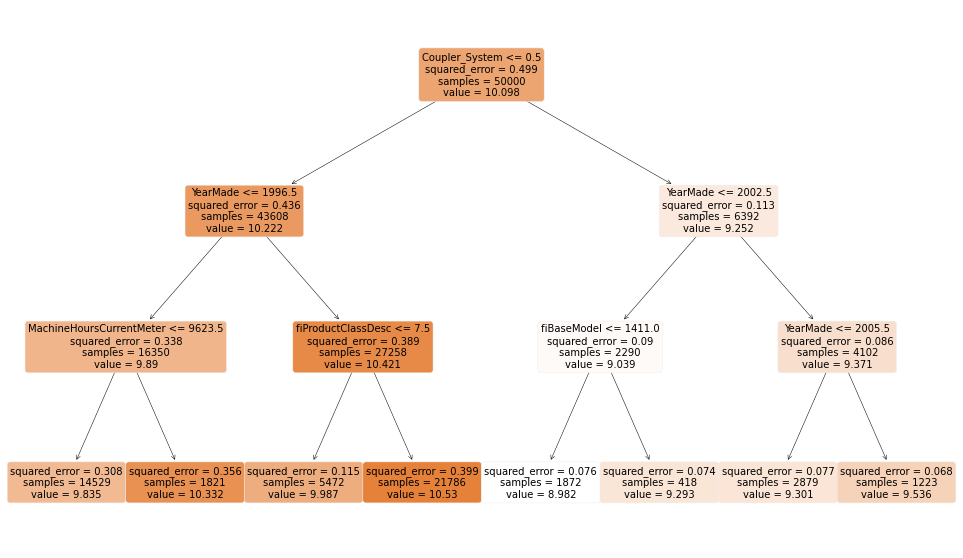

In [26]:
plt.figure(figsize = (17, 10))
plot_tree(decision_tree = random_forest_regressor.estimators_[0], filled = True, rounded = True, feature_names = X_train_single.columns, fontsize = 10) 

plt.show()

A decision tree carves up the feature space into groups of observations that share similar target values and each leaf represents one of these groups. 
For regression, similarity in a leaf means a low variance among target values and, for classification, it means that most or all targets are of a single class.

Any path from the root of the decision tree to a specific leaf predictor passes through a series of (internal) decision nodes. 
Each decision node compares a single feature's value with a specific split point value learned during training.
To train a decision node, the model examines a subset of the training observations (or the full training set at the root). 
The node's feature and split point within that feature space are chosen during training to split the observations into left and right buckets (subsets) to maximize similarity as defined above.
(This selection process is generally done through exhaustive comparison of features and feature values.)
The left bucket has observations whose feature values are all less than the split point and the right bucket has feature observations whose values are greater than the split point. 
Tree construction proceeds recursively by creating decision nodes for the left bucket and the right bucket. Construction stops when some stopping criterion is reached, such as having less than five observations in the node.

In [27]:
random_forest_regressor = RandomForestRegressor(n_estimators = 1, bootstrap = False, n_jobs = -1)
%time random_forest_regressor.fit(X = X_train, y = y_train)

print_model_performance(random_forest_regressor, X_train_single, X_valid, y_train_single, y_valid)

CPU times: user 14.3 s, sys: 355 ms, total: 14.7 s
Wall time: 14.8 s
Training R^2 score: 1.0
Training RMSE = 8.987733679556355e-17
Validation R^2 score: 0.7789908003509216
Validation RMSE = 0.35178813606061055


This tree is built on the entire data set and as we can see it overfits.
Furthermore,  $R^2$ score is $1.0$ on the training set but it is way worse on the validation set. 
The idea behind Random Forests is that we build a lot of such trees which are not **correlated** (in other words, they are not learned on the same data).
Each tree will be trained on subset of data picked at random with replacement - **bootstraping**.
When predicting the target variable each tree will offer its prediction and the final prediction (output of the model) will be the average of all predictions from the trees.

## A.6. Forest Predictions

In [28]:
random_forest_regressor = RandomForestRegressor(n_estimators = 10, n_jobs = -1)
%time random_forest_regressor.fit(X = X_train_single.values, y = y_train_single.values)

CPU times: user 8.24 s, sys: 25 ms, total: 8.27 s
Wall time: 3.02 s


RandomForestRegressor(n_estimators=10, n_jobs=-1)

In [29]:
x = X_valid.iloc[0, :]
y_true = y_valid.iloc[0]

trees_predictions = np.array([estimator.predict(X = [x]) for estimator in random_forest_regressor.estimators_])

print(f'Trees predictions: {trees_predictions.reshape(1, -1)[0]}. Average of trees predictions: {trees_predictions.mean()}')
print(f'Model prediction: {random_forest_regressor.predict([x])[0]}')
print(f'True value: {y_true}')

Trees predictions: [9.21034037 9.07680898 9.21034037 9.15904708 8.98719682 8.98719682
 9.21034037 9.21034037 9.02401079 9.21034037]. Average of trees predictions: 9.128596235192985
Model prediction: 9.128596235192985
True value: 9.104979856318357


## A.7. Out-Of-Bag (OOB) Score

`RandomForest`s can efficiently estimate the prediction error while training the model, completely avoiding the need for separate validation sets. 
The error score is called the out-of-bag score and is the typical metric computed.
Recall that RFs are a collection of decision trees, each of which is trained on a subset of the training data. 
The *out-of-bag (OOB)* score looks at the prediction accuracy for a particular record using only those trees that did not train on that record. 
Statisticians have shown that the out-of-bag score gives an excellent estimate of a model's generality, its true prediction error.

The out-of-bag score is still not free computationally and we have to ask for the computation with an argument, `oob_score = True`, to the constructor of the RF. 
Here's how to train a model that computes and prints the OOB score.

In [30]:
random_forest_regressor = RandomForestRegressor(n_estimators = 50, n_jobs = -1, oob_score = True)
%time random_forest_regressor.fit(X = X_train.values, y = y_train.values)

print_model_performance(random_forest_regressor, X_train.values, X_valid.values, y_train.values, y_valid.values)

CPU times: user 6min 25s, sys: 3.1 s, total: 6min 28s
Wall time: 1min 53s
Training R^2 score: 0.9872191260158779
Training RMSE = 0.0782011002448744
Validation R^2 score: 0.9009130142111167
Validation RMSE = 0.2355506579828504
Model's OOB score = 0.9083496155056502


Note that OOB score is similar to the validation score meaning that it proves that it can be used as a good estimate for the validation error.

## A.8. Reducing Overfitting

### A.8.1 Subsampling

Subsampling is a technique used to avoid overfitting by giving each tree in the forest a different random subset of the entire training data set for training.
By reducing overfitting we are able to generalize more accurately, hence increasing the validation score.

In [31]:
# max_samples - the number of samples to draw from training data set to train each base estimator.
random_forest_regressor = RandomForestRegressor(n_estimators = 50, n_jobs = -1, oob_score = True, max_samples = 50_000)
%time random_forest_regressor.fit(X = X_train.values, y = y_train.values)

print_model_performance(random_forest_regressor, X_train.values, X_valid.values, y_train.values, y_valid.values)

CPU times: user 1min 22s, sys: 1.03 s, total: 1min 23s
Wall time: 31 s
Training R^2 score: 0.9182143145135322
Training RMSE = 0.19782047301822037
Validation R^2 score: 0.8889036685929032
Validation RMSE = 0.249416897091724
Model's OOB score = 0.8945160883162663


### A.8.2 Tree Building Parameters

Another way to reduce overfitting is to grow our trees less deeply:

 - `min_samples_leaf` - The minimum number of samples required to be at a leaf node.
 
 - `max_depth` - The maximum depth of a tree.

In [32]:
random_forest_regressor = RandomForestRegressor(n_estimators = 50, n_jobs = -1, oob_score = True, min_samples_leaf = 5)
%time random_forest_regressor.fit(X = X_train.values, y = y_train.values)

print_model_performance(random_forest_regressor, X_train.values, X_valid.values, y_train.values, y_valid.values)

CPU times: user 4min 49s, sys: 1.04 s, total: 4min 50s
Wall time: 1min 23s
Training R^2 score: 0.9573801554205702
Training RMSE = 0.14280339017502117
Validation R^2 score: 0.901701451765373
Validation RMSE = 0.23461164515988062
Model's OOB score = 0.9062527341745669


In [33]:
random_forest_regressor = RandomForestRegressor(n_estimators = 50, n_jobs = -1, oob_score = True, max_depth = 10)
%time random_forest_regressor.fit(X = X_train.values, y = y_train.values)

print_model_performance(random_forest_regressor, X_train.values, X_valid.values, y_train.values, y_valid.values)

CPU times: user 2min 52s, sys: 613 ms, total: 2min 52s
Wall time: 51 s
Training R^2 score: 0.8118588638784396
Training RMSE = 0.30003676074216057
Validation R^2 score: 0.8293115423565085
Validation RMSE = 0.30915629220860796
Model's OOB score = 0.8076808294071736


We can also increase the amount of variation amongst the trees in the forest by not only using subsampling, but to also using a sample of columns for each split. 
We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

In [34]:
random_forest_regressor = RandomForestRegressor(n_estimators = 50, n_jobs = -1, oob_score = True, max_samples = 50_000, max_features = 0.7)
%time random_forest_regressor.fit(X = X_train.values, y = y_train.values)

print_model_performance(random_forest_regressor, X_train.values, X_valid.values, y_train.values, y_valid.values)

CPU times: user 59.2 s, sys: 1.01 s, total: 1min
Wall time: 24.2 s
Training R^2 score: 0.9196670509563937
Training RMSE = 0.19605568595684428
Validation R^2 score: 0.8910745168067566
Validation RMSE = 0.2469680431244796
Model's OOB score = 0.8963510109025297


**Notes:**

- We implemented techniques that are typically used to clean the dataset and prepare it for the model.
- We show the mechanics of how random forests make predictions.
- We describe hyperparameters of random forest model used to reduce overfitting.